In [9]:
import pandas as pd
import numpy as np
def summation_unit(inputs,weights):
    return np.dot(inputs,weights)
def step_acti(x):
    return 1 if x>=0 else 0
def bipol_acti(x):
    return 1 if x>=0 else -1
def sigmoid_acti(x):
    return 1/(1+np.exp(-x))
def tanh_acti(x):
    return np.tanh(x)
def relu_acti(x):
    return max(0,x)
def leaky_relu_acti(x):
    return x if x>0 else 0.01*x
def error_compare(target, output):
    return target-output
    

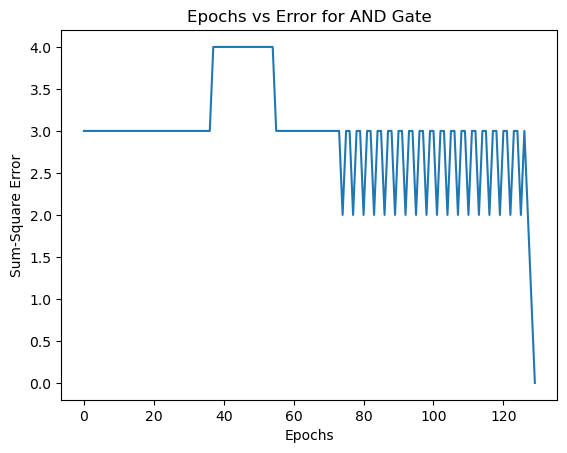

In [2]:
#A2:


weights = np.array([10, 0.2, -0.75])
learning_rate = 0.05

# Training Data for AND Gate
training_data = np.array([
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
])

targets = np.array([0, 0, 0, 1])
errors = []
epochs = 0

# Training Loop
for _ in range(1000):
    total_error = 0
    for i in range(len(training_data)):
        inputs = training_data[i]
        target = targets[i]
        
        summation = summation_unit(inputs, weights)
        output = step_acti(summation)
        error = error_compare(target, output)
        
        weights += learning_rate * error * inputs
        total_error += error**2
        
    errors.append(total_error)
    epochs += 1
    
    if total_error <= 0.002:
        break

# Plotting Epochs vs Error
import matplotlib.pyplot as plt
plt.plot(range(epochs), errors)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Epochs vs Error for AND Gate')
plt.show()


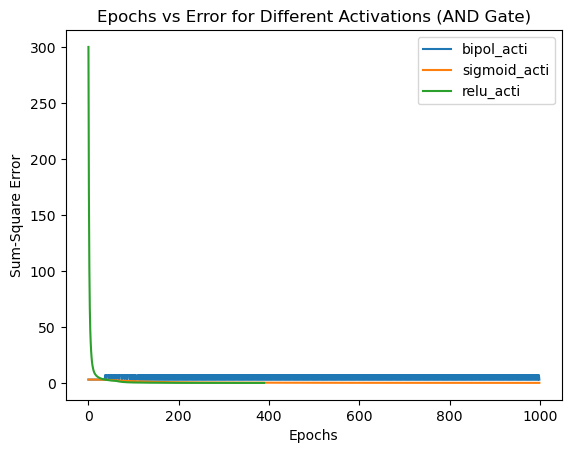

In [3]:
def train_perceptron(activation_function, weights, learning_rate, training_data, targets):
    errors = []
    epochs = 0

    for _ in range(1000):
        total_error = 0
        for i in range(len(training_data)):
            inputs = training_data[i]
            target = targets[i]

            summation = summation_unit(inputs, weights)
            output = activation_function(summation)
            error = error_compare(target, output)

            weights += learning_rate * error * inputs
            total_error += error**2

        errors.append(total_error)
        epochs += 1

        if total_error <= 0.002:
            break
            
    return epochs, errors

# Comparing with Bi-Polar Step, Sigmoid, and ReLU
activation_functions = [bipol_acti, sigmoid_acti, relu_acti]
for activation_function in activation_functions:
    epochs, errors = train_perceptron(activation_function, np.array([10, 0.2, -0.75]), 0.05, training_data, targets)
    plt.plot(range(epochs), errors, label=activation_function.__name__)

plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Epochs vs Error for Different Activations (AND Gate)')
plt.legend()
plt.show()


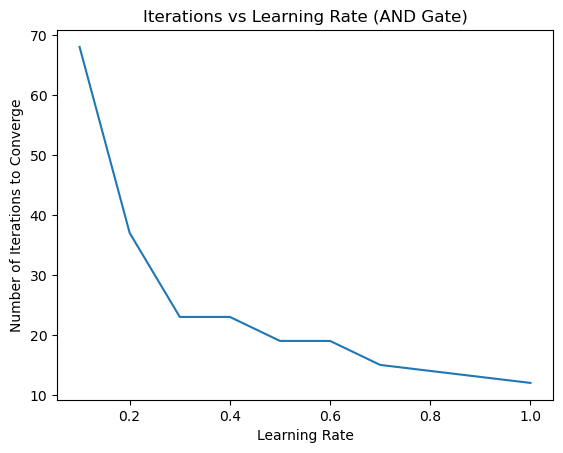

In [5]:
#A4:

learning_rates = [0.1 * i for i in range(1, 11)]
iterations = []

for lr in learning_rates:
    _, errors = train_perceptron(step_acti, np.array([10, 0.2, -0.75]), lr, training_data, targets)
    iterations.append(len(errors))

plt.plot(learning_rates, iterations)
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations to Converge')
plt.title('Iterations vs Learning Rate (AND Gate)')
plt.show()


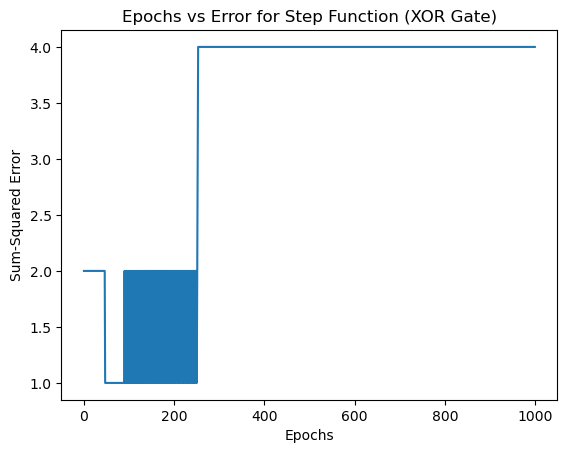

In [7]:
#A5:



# XOR gate logic inputs and targets
training_data_xor = np.array([
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
])

targets_xor = np.array([0, 1, 1, 0])

# Train and plot for XOR with Step function
epochs_xor, errors_xor = train_perceptron(step_acti, np.array([10, 0.2, -0.75]), 0.05, training_data_xor, targets_xor)

plt.plot(range(epochs_xor), errors_xor)
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.title('Epochs vs Error for Step Function (XOR Gate)')
plt.show()


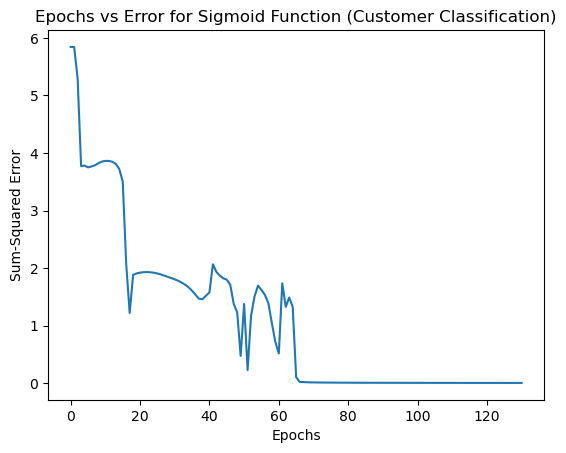

In [8]:
# Customer data and targets
customer_data = np.array([
    [1, 20, 6, 2],
    [1, 16, 3, 6],
    [1, 27, 6, 2],
    [1, 19, 1, 2],
    [1, 24, 4, 2],
    [1, 22, 1, 5],
    [1, 15, 4, 2],
    [1, 18, 4, 2],
    [1, 21, 1, 4],
    [1, 16, 2, 4]
])

targets_customer = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

# Train and plot for Customer Classification with Sigmoid function
epochs_customer, errors_customer = train_perceptron(sigmoid_acti, np.array([0.5, -0.5, 0.5, -0.5]), 0.05, customer_data, targets_customer)

plt.plot(range(epochs_customer), errors_customer)
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.title('Epochs vs Error for Sigmoid Function (Customer Classification)')
plt.show()
